# CSE 572: Data Mining
## Homework 2
## Varad Vijay Deshmukh

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn 


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Question 1(a) Data Preprocessing the Titanic Data 

### Understanding the raw data

In [2]:
df_train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train_data.info()
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
df_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


after looking at the above results we need to drop and remove some columns like cabin and tickets because these columns have mixed data of numerical value and alphabetical value hence good for correcting.

In [7]:
print("shape of train data", df_train_data.shape)
print("shape of test data", df_test_data.shape)

shape of train data (891, 12)
shape of test data (418, 11)


In [8]:
#droping ticket coloumn as its data is mixture of numerical data and alphabetical data 
#also droping cabin as it is alphanumeric data

df_train_data = df_train_data.drop(['Ticket', 'Cabin'], axis=1)
df_test_data = df_test_data.drop(['Ticket', 'Cabin'], axis=1)

print("After droping the columns shape of data")
print("shape of train data", df_train_data.shape)
print("shape of test data", df_test_data.shape)

After droping the columns shape of data
shape of train data (891, 10)
shape of test data (418, 9)


### Extracting features and creating new features

We will join the train and test data now for better extraction of features

In [9]:
data = [df_train_data,df_test_data]

When we see the coloumn "Name" we see that some name have a title attached to them for example "Montvila, Rev. Juozas" here Rev. is title and some Names have the general title like "Mr.".These title hold importance and can indicate survival. Hence, feature creation of titles is to be done

In [10]:
for d in data:
    d['Title'] = d.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train_data['Title'], df_train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


we can see that there are different and also they occur in different frequency. 'Mr.' and 'Mrs.' are common titles while "Lady" and "Sir" are very low in number and also reserved for important people. We can call these low frequency titles as important or "IMP". Also, "Mme" and "Mlle" are just synonym of the word "Miss" in different langauge and can be combined.

In [11]:
for d in data:
    d['Title'] = d['Title'].replace('Mlle', 'Miss')
    d['Title'] = d['Title'].replace('Ms', 'Miss')
    d['Title'] = d['Title'].replace('Mme', 'Miss')

data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


we will also replace the rare and important titles as "IMP" to make one category of important people

In [12]:
for d in data:
    d['Title'] = d['Title'].replace('Don', 'IMP')
    d['Title'] = d['Title'].replace('Sir', 'IMP')
    d['Title'] = d['Title'].replace('Lady', 'IMP')
    d['Title'] = d['Title'].replace('Countess', 'IMP')
    d['Title'] = d['Title'].replace('Capt', 'IMP')
    d['Title'] = d['Title'].replace('Dr', 'IMP')
    d['Title'] = d['Title'].replace('Rev', 'IMP')
    d['Title'] = d['Title'].replace('Jonkheer', 'IMP')
    d['Title'] = d['Title'].replace('Col', 'IMP')
    d['Title'] = d['Title'].replace('Dona', 'IMP')
    d['Title'] = d['Title'].replace('Major', 'IMP')

data[0].tail()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,IMP
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,Mr


We will check survived with respect to each title

In [13]:
df_train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,IMP,0.347826
1,Master,0.575000
2,Miss,0.704301
3,Mr,0.156673
4,Mrs,0.792000


Now we can drop "Name" from the dataset as well as "Ticket Number" because "Title" is more relevent.

In [14]:
df_train_data = df_train_data.drop(['Name', 'PassengerId'], axis=1)
df_test_data = df_test_data.drop(['Name'], axis=1)

In [15]:
df_train_data.shape
df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


### Changing features from one type to another

We will change the "Titles" from alphabetical data to ordinal data. Also we will change "Sex" with "male" and "female" string to 0 and 1.
We are changing strings to numerical data

In [16]:
data = [df_train_data,df_test_data]

In [17]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "IMP": 5}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [18]:
df_train_data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,male,27.0,0,0,13.00,S,5
887,1,1,female,19.0,0,0,30.00,S,2
888,0,3,female,NaN,1,2,23.45,S,2
889,1,1,male,26.0,0,0,30.00,C,1
890,0,3,male,32.0,0,0,7.75,Q,1


In [19]:
df_test_data.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
413,1305,3,male,NaN,0,0,8.0500,S,1
414,1306,1,female,39.0,0,0,108.9000,C,5
415,1307,3,male,38.5,0,0,7.2500,S,1
416,1308,3,male,NaN,0,0,8.0500,S,1
417,1309,3,male,NaN,1,1,22.3583,C,4


In [20]:
Sex_to_Int_map = {"male" : 0 , "female" : 1}

for d in data:
    d["Sex"] = d["Sex"].map(Sex_to_Int_map)

In [21]:
df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


We can group the ages in ordinal data in different age gaps

First we will need to fill the missing age values in data.

We will use Pclass and Sex to assume a age. Since there are 2 sexs and 3 classes we will have 6 combinations

In [22]:
Ages = np.zeros((2,3))

for d in data:
    for i in range(0,2):
        for j in range (0,3):
            df_ages = d[(d['Sex'] == i) & (d['Pclass'] == j+1)]['Age'].dropna()
            
            guessed_age = df_ages.median()
            Ages[i,j] = int( guessed_age/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            d.loc[ (d.Age.isnull()) & (d.Sex == i) & (d.Pclass == j+1),\
                    'Age'] = Ages[i,j]

    d['Age'] = d['Age'].astype(int)
            

In [23]:
df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Grouping age in different age gaps or Age_Class

In [24]:
df_train_data['Age_Class'] = pd.cut(df_train_data['Age'], 5)
df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Class
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"


Correlation between survival and age_class

In [25]:
df_train_data[['Age_Class', 'Survived']].groupby(['Age_Class'], as_index=False).mean().sort_values(by='Age_Class', ascending=True)

/tmp/ipykernel_33/3798218096.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train_data[['Age_Class', 'Survived']].groupby(['Age_Class'], as_index=False).mean().sort_values(by='Age_Class', ascending=True)


,Age_Class,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Making Age_class ordinal data 

In [26]:
for d in data:    
    d.loc[ d['Age'] <= 16, 'Age'] = 1
    d.loc[(d['Age'] > 16) & (d['Age'] <= 32), 'Age'] = 2
    d.loc[(d['Age'] > 32) & (d['Age'] <= 48), 'Age'] = 3
    d.loc[(d['Age'] > 48) & (d['Age'] <= 64), 'Age'] = 4
    d.loc[ d['Age'] > 64, 'Age']

In [27]:
df_train_data = df_train_data.drop(["Age_Class"],axis = 1)
df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,S,1
1,1,1,1,3,1,0,71.2833,C,3
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,3
4,0,3,0,3,0,0,8.0500,S,1


In [28]:
df_train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,S,1
1,1,1,1,3,1,0,71.2833,C,3
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,3
4,0,3,0,3,0,0,8.0500,S,1


Filling up empty data

In [29]:
freq_port = df_train_data.Embarked.dropna().mode()[0]
freq_port

'S'

Corelation between port and survival

In [30]:
data = [df_train_data,df_test_data]

In [31]:
freq_port

'S'

In [32]:

for d in data:
    d['Embarked'] = d['Embarked'].fillna(freq_port)

In [33]:
df_train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Changing embarked to numeric data

In [34]:
for d in data:
    d['Embarked'] = d['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,0,1
1,1,1,1,3,1,0,71.2833,1,3
2,1,3,1,2,0,0,7.9250,0,2
3,1,1,1,3,1,0,53.1000,0,3
4,0,3,0,3,0,0,8.0500,0,1


Converting fare into a numrical ordinal data

In [35]:
df_train_data['Fare_Class'] = pd.qcut(df_train_data['Fare'], 4)

Corelation betwen Fare_class and survival

In [36]:
df_train_data[['Fare_Class', 'Survived']].groupby(['Fare_Class'], as_index=False).mean().sort_values(by='Fare_Class', ascending=True)

/tmp/ipykernel_33/2200794744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train_data[['Fare_Class', 'Survived']].groupby(['Fare_Class'], as_index=False).mean().sort_values(by='Fare_Class', ascending=True)


,Fare_Class,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
data = [df_train_data,df_test_data]

Filling empty fare value in test before operating on both datasets.

In [38]:
median_fare = df_test_data['Fare'].dropna().median()

df_test_data['Fare'].fillna(median_fare, inplace=True)

/tmp/ipykernel_33/3677092641.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_data['Fare'].fillna(median_fare, inplace=True)


In [39]:
for d in data:
    d.loc[ d['Fare'] <= 7.91, 'Fare'] = 0
    d.loc[(d['Fare'] > 7.91) & (d['Fare'] <= 14.454), 'Fare'] = 1
    d.loc[(d['Fare'] > 14.454) & (d['Fare'] <= 31), 'Fare']   = 2
    d.loc[ d['Fare'] > 31, 'Fare'] = 3
    d['Fare'] = d['Fare'].astype(int)


In [40]:
df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_Class
0,0,3,0,2,1,0,0,0,1,"(-0.001, 7.91]"
1,1,1,1,3,1,0,3,1,3,"(31.0, 512.329]"
2,1,3,1,2,0,0,1,0,2,"(7.91, 14.454]"
3,1,1,1,3,1,0,3,0,3,"(31.0, 512.329]"
4,0,3,0,3,0,0,1,0,1,"(7.91, 14.454]"


In [41]:
df_train_data = df_train_data.drop("Fare_Class", axis = 1)

df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,0,0,1
1,1,1,1,3,1,0,3,1,3
2,1,3,1,2,0,0,1,0,2
3,1,1,1,3,1,0,3,0,3
4,0,3,0,3,0,0,1,0,1


### Model and Training

In [42]:
X_train = df_train_data.drop("Survived", axis=1)
Y_train = df_train_data["Survived"]
X_test  = df_test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Fare      891 non-null    int64
 6   Embarked  891 non-null    int64
 7   Title     891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


In [44]:
decision_tree = DecisionTreeClassifier(max_depth=12, criterion='entropy', min_samples_split=2)
classifier = decision_tree.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
acc_decision_tree = round(classifier.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.89

## Question 1(b)

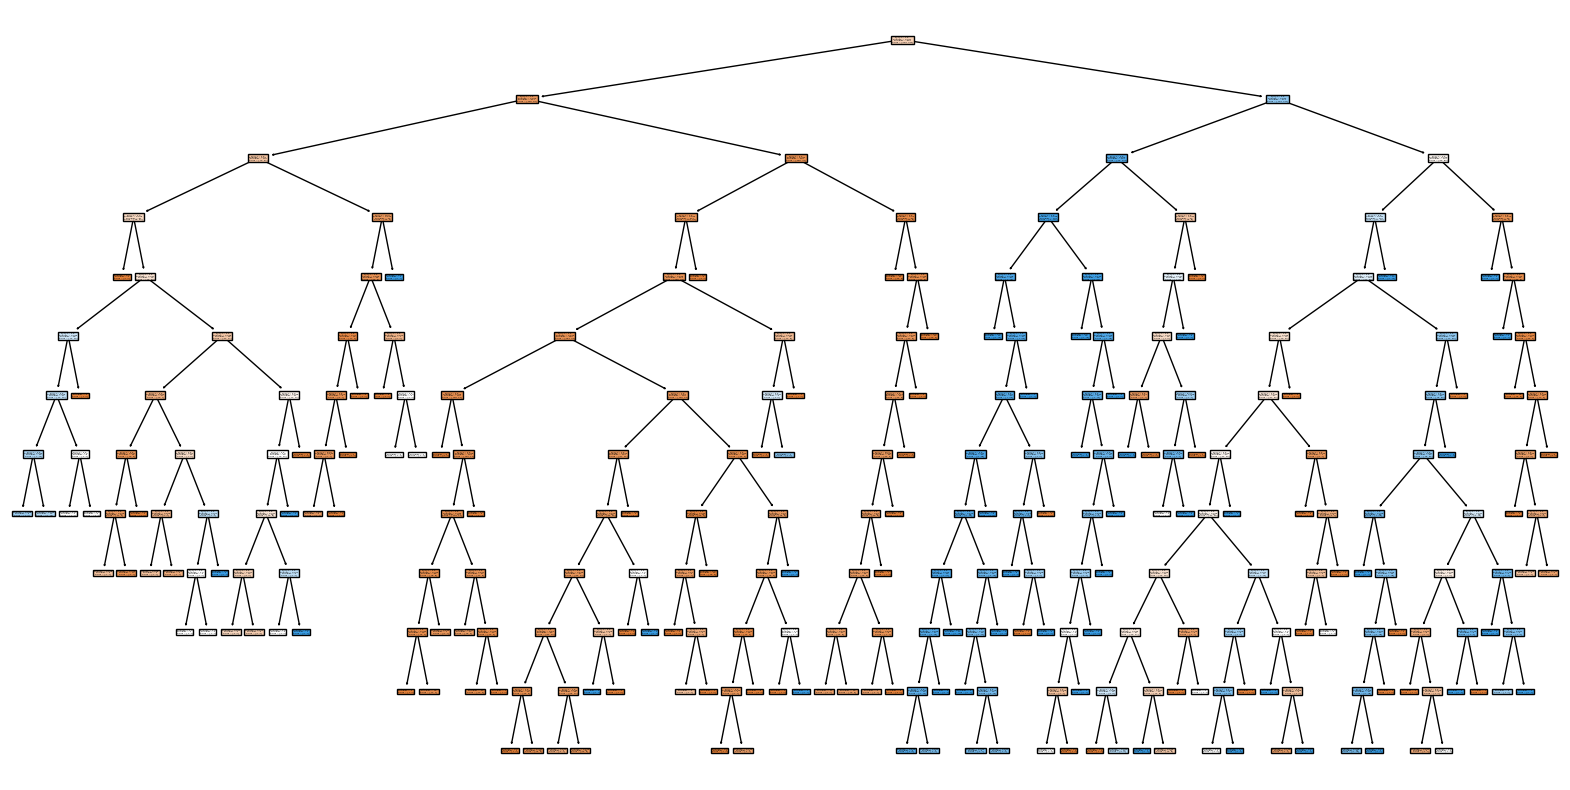

In [46]:
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True)
plt.show()

## Question 1(c)

In [47]:
scores_of_decision_tree = cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-validation scores for decision:", scores_of_decision_tree)
print("Average Classification accuracy for decision: ", scores_of_decision_tree.mean())

Cross-validation scores for decision: [0.78212291 0.79213483 0.80898876 0.78651685 0.82022472]
Average Classification accuracy for decision:  0.7979976147134519


## Question 1(d)

In [49]:
random_forest = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(random_forest, X_train, Y_train, cv=5)

print("Cross-validation scores:", scores)
print("Average Classification accuracy: ", scores.mean())

Cross-validation scores: [0.80446927 0.78089888 0.80898876 0.7752809  0.84831461]
Average Classification accuracy:  0.8035904839620865
